<a href="https://colab.research.google.com/github/Logan-Bz/PHYS3025Work/blob/main/Copy_of_PHYS_3025_Activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is adapted from Python tutorials by P. L. Lim, Adrian Price-Whelan, Kelle Cruz, and Stephanie T. Douglas with the AstroPy Foundation. I've modified them a bit to match our needs.
For the original cone search tutorial you can visit: https://learn.astropy.org/tutorials/conesearch.html . I've updated it to avoid errors and didn't use the last part but you can look there to see how to search more than one catalog at once and time the searches as well.
For the rest of the tutorial I based it on https://learn.astropy.org/tutorials/plot-catalog.html but the text files aren't available so we're using search methods to get data.

**The first few steps are just examples to get you started and learn the syntax for calling some of the tools in Astropy. Just click the arrow button to run the code. Note that you'll have to import each time you re-open the code.**

In [ ]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
!pip install astroquery #note we need to install it manually using !pip install
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 15.9 MB/s eta 0:00:00


We'll be using ConeSearch first. To start, it might be useful to list the available Cone Search catalogs first. By default, catalogs that pass nightly validation are included. Validation is hosted by Space Telescope Science Institute (STScI).

In [ ]:
conesearch.list_catalogs()

['2MASS All-Sky Catalog of Point Sources 1',
 'Gaia DR2 5',
 'Guide Star Catalog 2.3 Cone Search 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 1',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 2',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 3',
 'SDSS DR7 - Sloan Digital Sky Survey Data Release 7 4',
 'The HST Guide Star Catalog, Version 1.1 1',
 'The HST Guide Star Catalog, Version 1.2 1',
 'The HST Guide Star Catalog, Version GSC-ACT 1',
 'The PMM USNO-A1.0 Catalogue 1',
 'The USNO-A2.0 Catalogue 1',
 'The USNO-B1.0 Catalog 2',
 'Two Micron All Sky Survey (2MASS) 1',
 'Two Micron All Sky Survey (2MASS) 2']

Next, pick an astronomical object of interest. For example, M31. **You are not required to use the star you looked up on Simbad. It is okay to use M31 in these examples.**

In [ ]:
# My astronomical object is Vega
c = coord.SkyCoord.from_name('alpha lyr', frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (279.23473479, 38.78368896)>




By default, a basic Cone Search goes through the list of catalogs and stops at the first one that returns non-empty VO table. Let's search for objects within 0.1 degree around M31. You will see a lot of warnings that were generated by VO table parser but ignored by Cone Search service validator. VO compliance enforced by Cone Search providers is beyond the control of astroquery.vo_conesearch package.

The result is an[ Astropy](https://http://astropy.readthedocs.io/en/stable/table/index.html) table.


In [ ]:
result = conesearch.conesearch(c, 0.1 * u.degree)

Trying http://vizier.unistra.fr/viz-bin/conesearch/II/246/out?


In [ ]:
print('First non-empty table returned by', result.url)
print('Number of rows is', len(result))

First non-empty table returned by http://vizier.unistra.fr/viz-bin/conesearch/II/246/out?
Number of rows is 226


In [ ]:
print(result)

   _r     RAJ2000    DEJ2000   errMaj errMin ... scanKey coaddKey coadd Opt
            deg        deg     arcsec arcsec ...                           
-------- ---------- ---------- ------ ------ ... ------- -------- ----- ---
0.099121 279.242251  38.684742   0.22   0.20 ...   33663   774239   150 Opt
0.099537 279.121328  38.737999   0.09   0.08 ...   33662   774214   126 Opt
0.075483 279.175110  38.724228   0.08   0.08 ...   33662   774214   126 Opt
0.089483 279.175599  38.707008   0.13   0.11 ...   33662   774214   126 Opt
0.073159 279.176988  38.726032   0.21   0.18 ...   33662   774214   126 Opt
0.090076 279.127894  38.749424   0.17   0.17 ...   33662   774214   126 Opt
0.091859 279.179404  38.702599   0.08   0.08 ...   33662   774214   126 Opt
0.090700 279.183768  38.702164   0.22   0.21 ...   33663   774239   150 Opt
0.092526 279.184005  38.700050   0.07   0.07 ...   33663   774239   150 Opt
0.065864 279.171798  38.739761   0.07   0.07 ...   33662   774214   126 Opt
     ...    

This table can be manipulated like any other Astropy table; e.g., re-write the table into LaTeX format.

In [ ]:
result.write('my_result.tex', format='ascii.latex', overwrite=True)



You can now use your favorite text editor to open the my_result.tex file, but here, we are going to read it back into another Astropy table.

Note that the extra data_start=4 option is necessary due to the non-roundtripping nature of LaTeX reader/writer (see astropy issue [5205](https://github.com/astropy/astropy/issues/5205)).


In [ ]:
result_tex = Table.read('my_result.tex', format='ascii.latex', data_start=4)
print(result_tex)


   _r     RAJ2000    DEJ2000  errMaj errMin ... scanKey coaddKey coadd Opt
-------- ---------- --------- ------ ------ ... ------- -------- ----- ---
0.099121 279.242251 38.684742   0.22    0.2 ...   33663   774239   150 Opt
0.099537 279.121328 38.737999   0.09   0.08 ...   33662   774214   126 Opt
0.075483  279.17511 38.724228   0.08   0.08 ...   33662   774214   126 Opt
0.089483 279.175599 38.707008   0.13   0.11 ...   33662   774214   126 Opt
0.073159 279.176988 38.726032   0.21   0.18 ...   33662   774214   126 Opt
0.090076 279.127894 38.749424   0.17   0.17 ...   33662   774214   126 Opt
0.091859 279.179404 38.702599   0.08   0.08 ...   33662   774214   126 Opt
  0.0907 279.183768 38.702164   0.22   0.21 ...   33663   774239   150 Opt
0.092526 279.184005  38.70005   0.07   0.07 ...   33663   774239   150 Opt
0.065864 279.171798 38.739761   0.07   0.07 ...   33662   774214   126 Opt
     ...        ...       ...    ...    ... ...     ...      ...   ... ...
0.070353 279.305594 38.82

Cone Search results can also be used in conjuction with other types of queries. For example, you can query SIMBAD for the first entry in your result above.


In [ ]:
# Due to the unpredictability of external services,
# The first successful query result (above) might differ
# from run to run.
#
# CHANGE THESE VALUES to the appropriate RA and DEC
# column names you see above, if necessary.
# These are for http://gsss.stsci.edu/webservices/vo/ConeSearch.aspx?CAT=GSC23&
ra_colname = 'RAJ2000'
dec_colname = 'DEJ2000'
# Don't run this cell if column names above are invalid.
if ra_colname in result.colnames and dec_colname in result.colnames:
    row = result[0]
    simbad_obj = coord.SkyCoord(ra=row[ra_colname]*u.deg, dec=row[dec_colname]*u.deg)
    print('Searching SIMBAD for\n{}\n'.format(simbad_obj))
    simbad_result = Simbad.query_region(simbad_obj, radius=5*u.arcsec)
    print(simbad_result)
else:
    print('{} or {} not in search results. Choose from: {}'.format(
        ra_colname, dec_colname, ' '.join(result.colnames)))

Searching SIMBAD for
<SkyCoord (ICRS): (ra, dec) in deg
    (279.242251, 38.684742)>

None


/usr/local/lib/python3.10/dist-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '18:36:58.14024 +38:41:05.0712': No astronomical object found :
  warnings.warn("Warning: The script line number %i raised "


Now back to Cone Search... You can extract metadata of this Cone Search catalog.

In [ ]:
my_db = vos_catalog.get_remote_catalog_db(conf.conesearch_dbname)
my_cat = my_db.get_catalog_by_url(result.url)
print(my_cat.dumps())

{
    "authenticated_only": 0,
    "cap_description": "Cone search capability for table II/246/out (2MASS Point Source Catalogue, output (on a total of 470,992,970 sources))",
    "cap_index": 4,
    "cap_type": "conesearch",
    "content_level": "research",
    "content_type": "catalog",
    "created": "1/10/2008 11:19:42 PM",
    "creator_seq": "",
    "duplicatesIgnored": 4,
    "intf_index": 1,
    "intf_role": "std",
    "intf_type": "vs:paramhttp",
    "ivoid": "ivo://cds.vizier/ii/246",
    "mirror_url": "https://vizier.iucaa.in/viz-bin/conesearch/II/246/out?#http://vizieridia.saao.ac.za/viz-bin/conesearch/II/246/out?",
    "query_type": "",
    "reference_url": "http://cdsarc.unistra.fr/cgi-bin/cat/II/246",
    "region_of_regard": NaN,
    "res_description": "The Two Micron All Sky Survey (2MASS) project is designed to close the gap between our current technical capability and our knowledge of the near-infrared sky. In addition to providing a context for the interpretation of r

If you have a favorite catalog in mind, you can also perform Cone Search only on that catalog. A list of available catalogs can be obtained by calling conesearch.list_catalogs(), as mentioned above. For example 'The USNO-A2.0 Catalogue 1'

In [ ]:
# I will be using the Gaia database since this has parallax values
try:
    result = conesearch.conesearch(
        c, 0.1 * u.degree, catalog_db='Gaia DR2 5')
except Exception as e:
    # We provide a cached version of the result table in case the query fails
    # due to an intermittent server-side issue, or if you do not have an
    # internet connection
    result = Table.read('usno-A2-result.fits')

print('Number of rows is', len(result))

Trying http://vizier.unistra.fr/viz-bin/conesearch/I/345/gaia2?
Number of rows is 717




Let's explore the 3 rows of astronomical objects found within 0.1 degree of M31 in the given catalog and sort them by increasing distance. For this example, the VO table has several columns that might include:

    _r = Angular distance (in degrees) between object and M31
    USNO-A2.0 = Catalog ID of the object
    RAJ2000 = Right ascension of the object (epoch=J2000)
    DEJ2000 = Declination of the object (epoch=J2000)

Note that column names, meanings, order, etc. might vary from catalog to catalog.


In [ ]:
col_names = result.colnames
print(col_names)



['_r', 'DR2Name', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'SolID', 'Source', 'RandomI', 'Epoch', 'Plx', 'e_Plx', 'RPlx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NbAL', 'gofAL', 'chi2AL', 'epsi', 'sepsi', 'Solved', 'APF', 'WAL', 'pscol', 'e_pscol', 'fvarpi', 'MatchObsA', 'Nper', 'amax', 'type', 'MatchObs', 'Dup', 'o_Gmag', 'FG', 'e_FG', 'RFG', 'Gmag', 'e_Gmag', 'o_BPmag', 'FBP', 'e_FBP', 'RFBP', 'BPmag', 'e_BPmag', 'o_RPmag', 'FRP', 'e_FRP', 'RFRP', 'RPmag', 'e_RPmag', 'E_BR_RP_', 'Mode', 'BP-RP', 'BP-G', 'G-RP', 'RV', 'e_RV', 'o_RV', 'Tefftemp', 'loggtemp', '__Fe_H_temp', 'Var', 'GLON', 'GLAT', 'ELON', 'ELAT', 'fPriam', 'Teff', 'b_Teff', 'B_Teff', 'AG', 'b_AG', 'B_AG', 'E_BP-RP_', 'b_E_BP-RP_', 'B_E_BP-RP_', 'fFLAME', 'Rad', 'b_Rad', 'B_Rad', 'Lum', 'b_Lum', 'B_Lum', 'RAJ2000', 'e_RAJ2000', 'DEJ2000', 'e_DEJ2000']


In [ ]:
# Before sort
print(result)



   _r              DR2Name            ...     DEJ2000     e_DEJ2000
                                      ...       deg          mas   
-------- ---------------------------- ... --------------- ---------
0.099578 Gaia DR2 2097890970599942016 ...  38.69433365830   25.2039
0.096887 Gaia DR2 2097890966305682176 ...  38.69486484300    6.8922
0.099437 Gaia DR2 2097890970599947776 ...  38.69656862520   55.6084
0.095962 Gaia DR2 2097890966305682432 ...  38.69809750440    2.4756
0.098488 Gaia DR2 2097891073679076608 ...  38.68524544280   33.2854
0.099376 Gaia DR2 2097891039319356160 ...  38.68582780470   51.4563
0.090868 Gaia DR2 2097891108038836352 ...  38.69379684290   15.4612
0.098281 Gaia DR2 2097891039323180160 ...  38.68664689210    4.0602
0.088998 Gaia DR2 2097891108042655616 ...  38.69494115970    0.4860
0.088786 Gaia DR2 2097891108042658688 ...  38.69553293340    2.2617
     ...                          ... ...             ...       ...
0.092079 Gaia DR2 2097942029171394944 ...  38.87

In [ ]:
# After sort
result.sort('_r')
print(result)



   _r              DR2Name            ...     DEJ2000     e_DEJ2000
                                      ...       deg          mas   
-------- ---------------------------- ... --------------- ---------
0.009247 Gaia DR2 2097892344989583488 ...  38.77499139550    4.9676
0.009914 Gaia DR2 2097940757860954496 ...  38.78936913200    2.1262
0.013047 Gaia DR2 2097893822458346496 ...  38.77404802220    0.6621
0.013220 Gaia DR2 2097939280392187776 ...  38.77473861170   15.6847
0.014422 Gaia DR2 2097940757864622976 ...  38.79387974850    2.3404
0.015861 Gaia DR2 2097939280395869696 ...  38.78628358580    0.5269
0.016911 Gaia DR2 2097940826580456960 ...  38.79837676270    8.2892
0.017102 Gaia DR2 2097939280393654784 ...  38.77332249040   11.1070
0.018369 Gaia DR2 2097939280395867648 ...  38.77826445880   14.2797
0.018712 Gaia DR2 2097892344989576832 ...  38.76498617250   15.6806
     ...                          ... ...             ...       ...
0.099437 Gaia DR2 2097890970599947776 ...  38.69

Now let's do some astrophysics. Suppose we wanted to make a plot



**Part 1)**

Let's look at stars in the  Perseus OB-1 double cluster.



1.  We're going to do a cone search of stars in the Gaia catalog ('Gaia DR2 5') and save to an ascii. Note that the search needs a name in the proper format so we're looking for NGC 869/884 which is one catalog name of the double cluster.
2.    It's pretty large but let's look within a tenth of a degree of the the cluster.
3.  To get the commands, use the examples we just did as a starting point. Also, print the column names as it will help you later. (see the result = consearch...) steps earlier in the tutorial.
4. Also you will probably want to print the column names to help with later steps.


Let's save this as a csv.

In [ ]:
result.write('my_result.csv', format='ascii.csv', overwrite=True)

Now let's read it. Note that if had a downloaded csv it might be a different command. See https://learn.astropy.org/tutorials/plot-catalog.html.

In [ ]:
data = Table.read("my_result.csv")
print(data)

   _r              DR2Name            ...    DEJ2000    e_DEJ2000
-------- ---------------------------- ... ------------- ---------
0.009247 Gaia DR2 2097892344989583488 ... 38.7749913955    4.9676
0.009914 Gaia DR2 2097940757860954496 ...  38.789369132    2.1262
0.013047 Gaia DR2 2097893822458346496 ... 38.7740480222    0.6621
 0.01322 Gaia DR2 2097939280392187776 ... 38.7747386117   15.6847
0.014422 Gaia DR2 2097940757864622976 ... 38.7938797485    2.3404
0.015861 Gaia DR2 2097939280395869696 ... 38.7862835858    0.5269
0.016911 Gaia DR2 2097940826580456960 ... 38.7983767627    8.2892
0.017102 Gaia DR2 2097939280393654784 ... 38.7733224904    11.107
0.018369 Gaia DR2 2097939280395867648 ... 38.7782644588   14.2797
0.018712 Gaia DR2 2097892344989576832 ... 38.7649861725   15.6806
     ...                          ... ...           ...       ...
0.099376 Gaia DR2 2097891039319356160 ... 38.6858278047   51.4563
0.099437 Gaia DR2 2097890970599947776 ... 38.6965686252   55.6084
0.099456 G

Let's see the parallax column. You can use the command below to access the parallax column. The general syntax is data['*colname*'] where colname is the column you want to access using the naming we found when we printed the column names.

In [ ]:
data['Plx']

0.7437
0.8411
--
8.3
0.2082
2.2146
-0.0805
0.3347
-0.6444
1.0939
--


Note that we need to get rid of the negative parallaxes which are not physical. In reality we should figure out why they're negative but for now we'll just skip them. Use the command below.

In [ ]:
data_clean=data[data["Plx"]>=0]

**Part 2**


1.   Covert the parallax column to distance in parsecs. Note that the unit of parallax for Gaia is mas (milli-arcsecond).
2.   In a cell below print the first three and last three distances in the table (that is distance of stars 0-2 and -3->-1).  The syntax is array[0:2] for the first three and array[-3:-1] for the last three. Python starts counting at 0, so entry 1 is cell 0. Likewise, to access cells we can also use reverse counting where the last cell is [-1].

In [ ]:
#code for part 2 goes here
distance = 1 / (data_clean['Plx'] * 1E-3)
print(data_clean)

   _r              DR2Name            ... e_DEJ2000      distance     
-------- ---------------------------- ... --------- ------------------
0.009247 Gaia DR2 2097892344989583488 ...    4.9676  1344.628210299852
0.009914 Gaia DR2 2097940757860954496 ...    2.1262 1188.9192723814053
0.013047 Gaia DR2 2097893822458346496 ...    0.6621                 --
 0.01322 Gaia DR2 2097939280392187776 ...   15.6847 120.48192771084337
0.014422 Gaia DR2 2097940757864622976 ...    2.3404  4803.073967339097
0.015861 Gaia DR2 2097939280395869696 ...    0.5269  451.5488124266233
0.017102 Gaia DR2 2097939280393654784 ...    11.107  2987.750224081267
0.018712 Gaia DR2 2097892344989576832 ...   15.6806  914.1603437242892
0.019201 Gaia DR2 2097893788098653824 ...   19.7483                 --
0.019763 Gaia DR2 2097939280392169216 ...    0.9074                 --
     ...                          ... ...       ...                ...
 0.09922 Gaia DR2 2097891829593307648 ...   32.0424 2137.6656690893547
0.0993

In [ ]:
print(data_clean[0:2])
print(data_clean[-3:-1])

   _r              DR2Name            ... e_DEJ2000      distance     
-------- ---------------------------- ... --------- ------------------
0.009247 Gaia DR2 2097892344989583488 ...    4.9676  1344.628210299852
0.009914 Gaia DR2 2097940757860954496 ...    2.1262 1188.9192723814053
   _r              DR2Name            ... e_DEJ2000      distance    
-------- ---------------------------- ... --------- -----------------
0.099665 Gaia DR2 2097894196120388992 ...    1.6303 3121.098626716604
0.099701 Gaia DR2 2097892993529511936 ...    3.0137 218.8088048663078


**Part 3**
Oh no! Not all the distances are the same as we'd expect for a star cluster (we'll talk about that!). I wonder if there's a difference between stars in the cluster and stars outside of it.


1.   Let's plot Right Ascension (RAJ2000) vs Declination (DEJ2000) and use distance  as a color axis to see if we ca find where those stars are.

 I have the paritial code below but it needs you to have calculated distance. Note we have to use log10 because of the spread between distances. Note, if you gave the distance variable a different name, you'll need to modify this.

Text(0, 0.5, 'DEC (deg)')

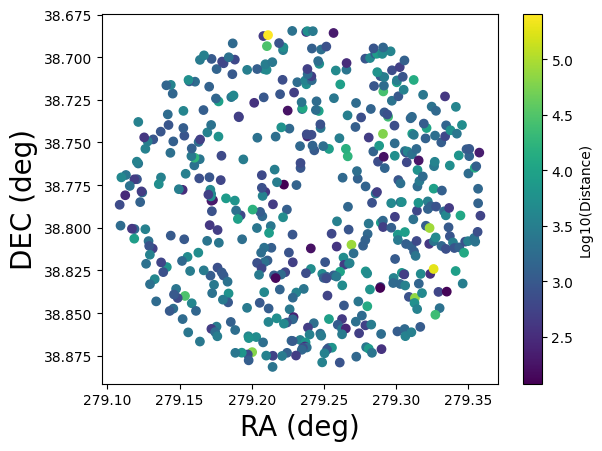

In [ ]:
plt.scatter(data_clean["RAJ2000"],data_clean["DEJ2000"],c=np.log10(distance)) # plot J-K vs. J
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("RA (deg)", fontsize=20)
plt.ylabel("DEC (deg)", fontsize=20)



**Part 4**
Okay, so that didn't really help!


1.  Try plotting either proper motion (pmRA vs pmDE) or Radial Velocity (RV) vs distance and write about what you observe. Keep distance as a color dimension. Proper motion is the apparent motion of a star whereas radial velocity is the line of sight motion. Stars in a cluster would be expected to have common motion...but even so it's not clear! There are some possible reaons for this.

2. After that, make a color-magnitude diagram by plotting BP-RP on X and absolute Gmag on Y. Let's keep distance as the color dimension.  **Keep in mind you'll need to calculate the absolute Gmag using the equaions from class! We'll talk more about what this plot says later in class.**

Text(0, 0.5, 'pmDE (km/s)')

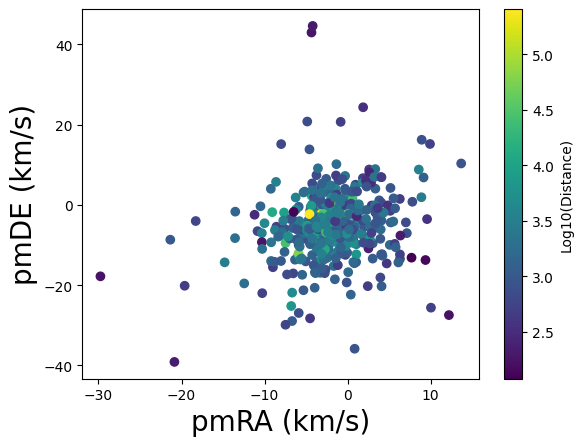

In [ ]:
#Code for part 4 goes here
plt.scatter(data_clean['pmRA'],data_clean['pmDE'],c=np.log10(distance))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.xlabel("pmRA (km/s)", fontsize=20)
plt.ylabel("pmDE (km/s)", fontsize=20)

Text(0, 0.5, 'Gmag')

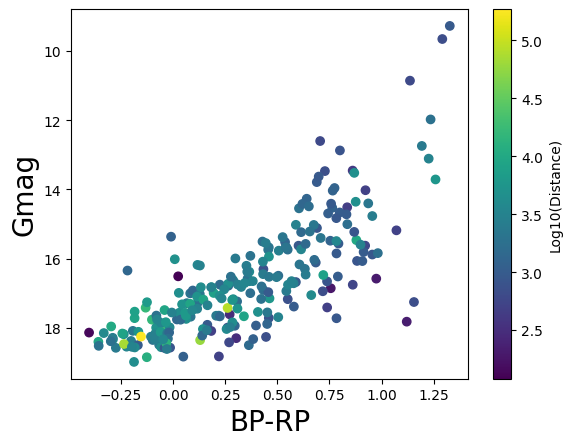

In [ ]:
plt.scatter(data_clean['BP-RP'],data_clean["Gmag"],c=np.log10(distance))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.ylim(reversed(plt.ylim())) # flip the y-axis
plt.xlabel("BP-RP", fontsize=20)
plt.ylabel("Gmag", fontsize=20)

**Part 5**
After this we'll do a few more plots.
1. Let's plot Temperature (Teff) vs Luminisoity (Lum);
2. Radius (Rad) vs Luminosity,
3.  Color (BP-RP) vs Teff.
4. Write a few sentences about what you observe.

Text(0, 0.5, 'Luminosity')

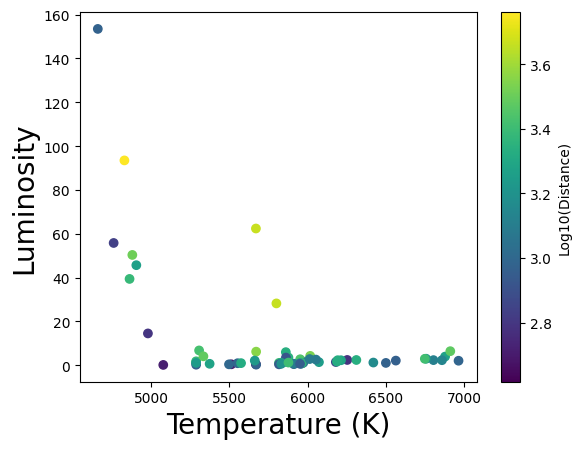

In [ ]:
#code for part 5 goes here
plt.scatter(data_clean['Teff'],data_clean["Lum"],c=np.log10(distance))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.xlabel("Temperature (K)", fontsize=20)
plt.ylabel("Luminosity", fontsize=20)

Text(0, 0.5, 'Luminosity')

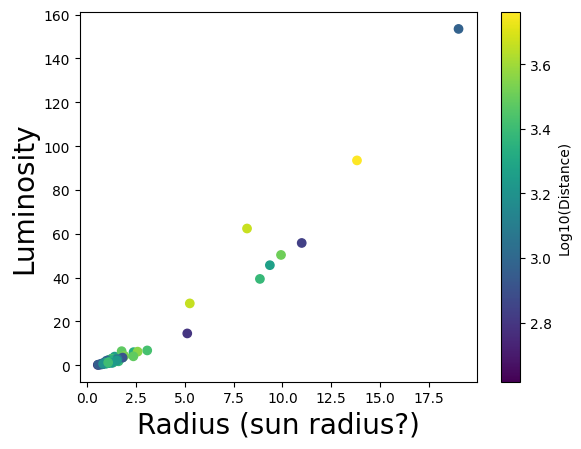

In [ ]:
plt.scatter(data_clean['Rad'],data_clean["Lum"],c=np.log10(distance))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.xlabel("Radius (sun radius?)", fontsize=20)
plt.ylabel("Luminosity", fontsize=20)

Text(0, 0.5, 'Temperature (K)')

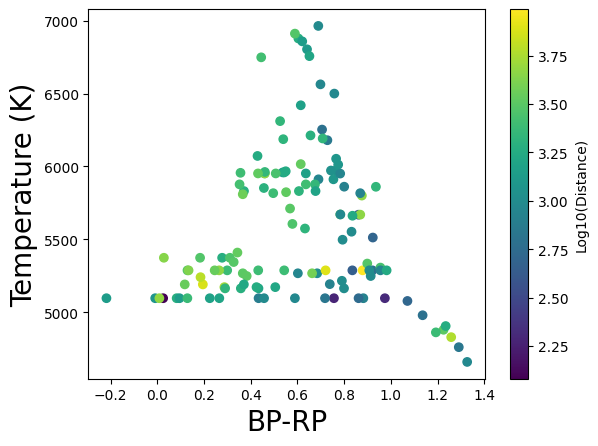

In [ ]:
plt.scatter(data_clean['BP-RP'],data_clean["Teff"],c=np.log10(distance))
cbar=plt.colorbar()
cbar.set_label('Log10(Distance)')
plt.xlabel("BP-RP", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=20)

Answers can go here (click this cell)

Analyzing each graph seperately:
The **first graph** we simply plot the position of the stars using right ascension and declination. We can actually see the "cone" shape that is made although it is a circle because it is the intersection of our cone with the celestial sphere.

For the **second graph**, we can more or less see how the stars are moving. We can also say that either coincidentally or not, the closer stars are moving faster and the farther stars are moving slower.

Now for the **third graph** we can see a general trend. Mainly that as the BP-RP value, the (G)magnitude of the star decreases (brighter). I will note that I'm not sure what the BP-RP value is other than it has something to do with combining a red photometer and a blue photometer. This graph also has a distance tend in that we see an increase of Gmag for closer stars and farther stars have less Gmag.

The **fourth graph** tells us the lower temperature a star is, the more luminous it is and that the higher temperature it is, the less luminous it is. We can also see that luminosity "levels out" at zero. I think this kind of makes sense because it is harder to see blue light (higher temp stars) than it is to see red light (lower temp stars).

For the **fifth graph**, we see a good linear relation between the luminosity of the star and the radius of the star; which is what we would expect. With the stars with higher radius being more luminous and the stars with less radius being less luminous. We can also see that the majority of stars are around 1 and I'm guessing Gaia uses the radii of stars to be the sun's radius. Which makes sense because the majority of stars are in the main sequence which have radii of approximately the sun's radius.

The **sixth graph** which is also the last graph gives a trend between the BP-RP value and the temperature. I think a higher BP-RP value means the star is more red and a low BP-RP value means the star is more blue. With that being said, we see a general pyramid shape in this graph. I think the left side has stars like blue supergiants while the right side has stars like red giants. Then towards the peaks of the pyramid, we get stars that are compact like dwarfs or some main sequence stars.